#### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

#### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
#### 3. First look at its main features (head, shape, info).

In [2]:
#Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
#First look at its main features (head, shape, info).
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.head())
print(customer_df.shape)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)


In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores) lower case the column, and put _ between words

In [4]:
customer_df.columns = [e.lower().replace(' ', '_') for e in customer_df.columns]
customer_df = customer_df.rename(columns={'employmentstatus':'employment_status'})

#### 5. Change effective to date column to datetime format.

In [5]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

##### additional checks

In [6]:
# checking Nan values
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [7]:
# checking duplicate rows
sum(customer_df.duplicated())

0

#### 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

Now numerical values

In [8]:
customer_df_num = customer_df.select_dtypes(include = ['float64', 'int64'])

In [9]:
# count of unique values in each column
#print(customer_df_num.nunique())
# for now continuous -> ['customer_lifetime_value'], ['income'], ['total_claim_amount'] 
customer_df_num.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [10]:
# discrete -->> 
#['months_since_policy_inception'], ['number_of_policies'],['number_of_open_complaints'],['monthly_premium_auto'], ['months_since_last_claim']
#np.sort(customer_df_num['monthly_premium_auto'].unique())
#np.sort(customer_df_num['months_since_policy_inception'].unique())
# I decided 202 and 100 unique value counts must be discrete, they are less than 3% of the column values

In [11]:
# shows the percentage of unique values in a column
round(customer_df_num.nunique()/len(customer_df_num),4)*100  
uniques = pd.DataFrame(round(customer_df_num.nunique()/len(customer_df_num),4)*100)
uniques = uniques.reset_index()
uniques.columns = ['header_name', 'percent_uniques']
uniques.head(10)

,header_name,percent_uniques
0,customer_lifetime_value,88.03
1,income,62.34
2,monthly_premium_auto,2.21
3,months_since_last_claim,0.39
4,months_since_policy_inception,1.09
5,number_of_open_complaints,0.07
6,number_of_policies,0.10
7,total_claim_amount,55.90


In [12]:
#shows more than 3 percent
continuous_df_cols = uniques[uniques['percent_uniques']>10]['header_name']  
discrete_df_cols = uniques[uniques['percent_uniques']<=10]['header_name'] 
print(continuous_df_cols.values)
print(discrete_df_cols.values)

['customer_lifetime_value' 'income' 'total_claim_amount']
['monthly_premium_auto' 'months_since_last_claim'
 'months_since_policy_inception' 'number_of_open_complaints'
 'number_of_policies']


In [13]:
continuous_df = customer_df_num.drop(columns=discrete_df_cols, axis=1)
discrete_df = customer_df_num.drop(columns=continuous_df_cols, axis=1)
display(discrete_df.head())
display(continuous_df.head())

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


### function

#### I decided, if a column contains more than %10 uniques values, it can be continuous data,
#### there are 3 columns having more than %50 unique values already
#### for the discrete data, I thought less than %10 unique values

In [14]:
def uniques(df):

    #pull the numeric columns of the dataframe
    df_num = df.select_dtypes(include = ['float64', 'int64'])

    # shows the percentage of unique values in a column
    round(df_num.nunique()/len(df_num),4)*100  
    uniques = pd.DataFrame(round(df_num.nunique()/len(df_num),4)*100)
    uniques = uniques.reset_index()
    uniques.columns = ['header_name', 'percent_uniques']

    # splitting from %3 percent of unique values
    continuous_df_cols = uniques[uniques['percent_uniques']>10]['header_name']  
    discrete_df_cols = uniques[uniques['percent_uniques']<=10]['header_name'] 

    # print discrete and continuous columns
    continuous_df = df_num.drop(columns=discrete_df_cols, axis=1)
    discrete_df = df_num.drop(columns=continuous_df_cols, axis=1)
    

    return discrete_df, continuous_df

discrete_df, continuous_df = uniques(customer_df_num)

In [15]:
display(discrete_df)
display(continuous_df)

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


#### 7. Plot a correlation matrix, comment what you see.

In [16]:
df_num_corr = customer_df_num.corr()['total_claim_amount'][:-1] # -1 because the latest row is total_claim_amount
strong_corr = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} slightly correlated value with total_claim_amount:\n{}".format(len(strong_corr), strong_corr))

There is 1 slightly correlated value with total_claim_amount:
monthly_premium_auto    0.632017
Name: total_claim_amount, dtype: float64


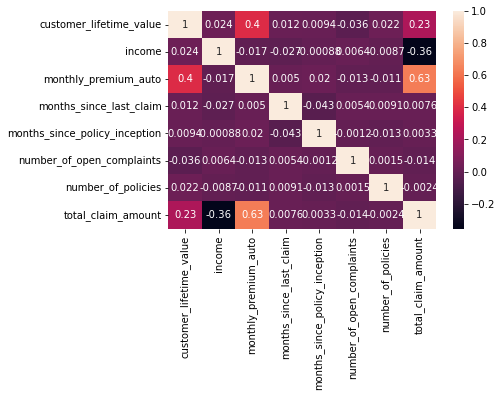

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
correlations_matrix = customer_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [18]:
# as far as I see below, even though 'number_of_policies' and 'number_of_complaints' are numerical, 
# they can be converted to categorical
#montly_premium_auto and total_claim_amount, I would say maybe linear correlation in some cases

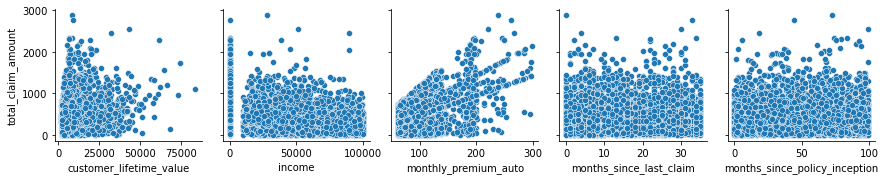

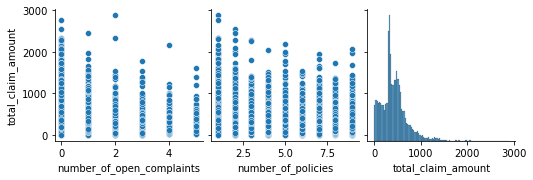

In [19]:
for i in range(0, len(customer_df_num.columns), 5):
    sns.pairplot(data=customer_df_num,
                x_vars=customer_df_num.columns[i:i+5],
                y_vars=['total_claim_amount'])

#### 8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

array([[<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>],
       [<AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:>]], dtype=object)

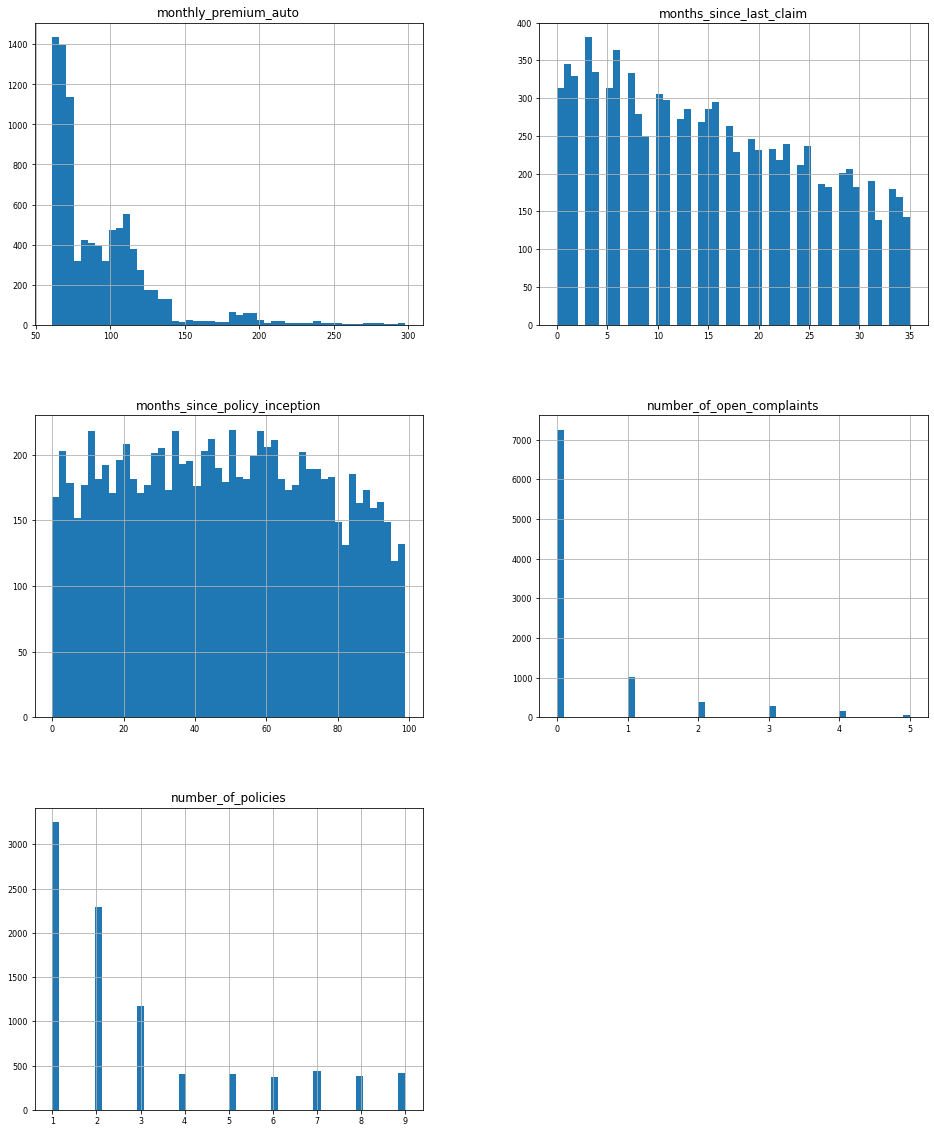

In [20]:
discrete_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [21]:
def ploting(df):
    for i in df.columns:
        plt.figure()
        plt.hist(df[i])

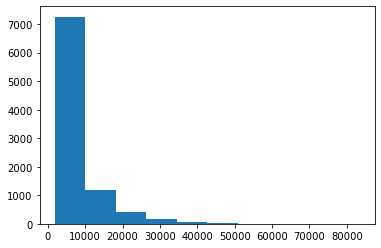

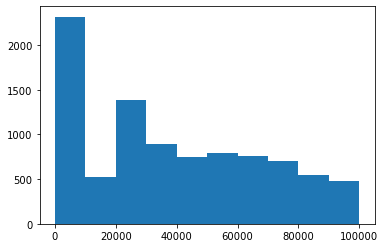

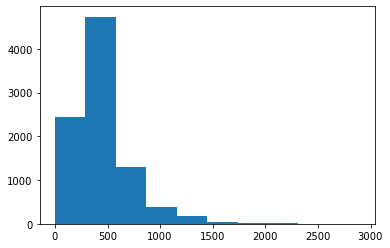

In [22]:
ploting(continuous_df)

#### 9. Comment what you can see in the plots.

I would say number_of_policies and number_of_open_complaints can be categorical,
and for monthly_premium_auto towards the higher there can be outliers

#### 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
#### 11. Did you find outliers? Comment what you will do with them.

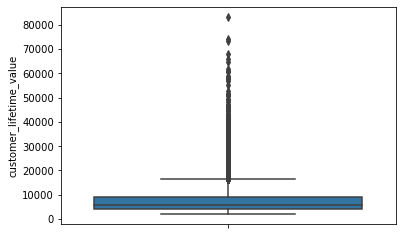

In [23]:
sns.boxplot(y=continuous_df['customer_lifetime_value'])
plt.show()

In [24]:
extraordinary_points = continuous_df[continuous_df['customer_lifetime_value'] >50000]
len(extraordinary_points)  # This checks the number of points that will be removed

20

I will drop the outliers from customer_lifetime_value later in the end

In [25]:
customer_df.shape

(9134, 24)

In [26]:
continuous_df.shape

(9134, 3)

In [27]:
discrete_df.shape

(9134, 5)

In [28]:
numerical_df = pd.concat([discrete_df, continuous_df], axis=1)
numerical_df.head()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,total_claim_amount
0,69,32,5,0,1,2763.519279,56274,384.811147
1,94,13,42,0,8,6979.535903,0,1131.464935
2,108,18,38,0,2,12887.431650,48767,566.472247
3,106,18,65,0,7,7645.861827,0,529.881344
4,73,12,44,0,1,2813.692575,43836,138.130879


In [29]:
customer_df = customer_df[customer_df.customer_lifetime_value < 50000]
numerical_df = numerical_df[numerical_df.customer_lifetime_value < 50000]

#### 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [30]:
# there are no NaN values. I have checked at the beginning
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### Lab-cleaning- categorical-data

#### 2. Find all of the categorical data. Save it in a categorical_df variable.

In [31]:
categorical_df = customer_df.select_dtypes(object)

#### 3. Check for NaN values.

In [32]:
categorical_df.isna().sum()
categorical_df.shape

(9114, 15)

#### 4. Check all unique values of columns.

In [33]:
categorical_df.nunique()

customer             9114
state                   5
response                2
coverage                3
education               5
employment_status       5
gender                  2
location_code           3
marital_status          3
policy_type             3
policy                  9
renew_offer_type        4
sales_channel           4
vehicle_class           6
vehicle_size            3
dtype: int64

#### 5.Check dtypes. Do they all make sense as categorical data?

#### 6.Does any column contain alpha and numeric data? Decide how to clean it.

#### 7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [34]:
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [35]:
categorical_df.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


customer column contains alpha-numeric data
I split from the first two letter. I thought maybe they are cities/counties/neighbourhoods etc and I could make category
but there are 677 unique values and I don't understand what they are.
So I will drop that 'customer' column

In [36]:
categorical_df = categorical_df.drop(['customer'], axis=1)

I combine marital status only married-single. Would add divorced+single.

In [37]:
def cleanmarit(x):
    if 'Married' in x:
        return "Married"
    else:
        return 'Single'
    
categorical_df['marital_status'] = categorical_df['marital_status'].apply(cleanmarit)

I changed employment_status categories

In [38]:
def cleanemsta(x):
    if 'Employed' in x:
        return "Employed"
    elif 'Unemployed' in x:
        return "Unemployed"
    else:
        return 'Other'
    
categorical_df['employment_status'] = categorical_df['employment_status'].apply(cleanemsta)
categorical_df['employment_status'].value_counts()

Employed      5685
Unemployed    2311
Other         1118
Name: employment_status, dtype: int64

#### 8.Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

'policy' looks like a sub-group of policy type.
In the 'policy' column it is already stated that if a car is Corporate-Special or Personal.
So I would drop the policy_type column

the way that Simao did, grouped policy into L1, L2, L3 would be better.

In [39]:
categorical_df['policy_type'].value_counts(dropna=False).head(10)

Personal Auto     6770
Corporate Auto    1966
Special Auto       378
Name: policy_type, dtype: int64

In [40]:
categorical_df['policy'].value_counts(dropna=False).head(10)

Personal L3     3417
Personal L2     2118
Personal L1     1235
Corporate L3    1013
Corporate L2     594
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [41]:
categorical_df = categorical_df.drop(['policy_type'], axis=1)

#### 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

I reduced the vehicle_class categories

In [42]:
categorical_df['vehicle_class'].value_counts(dropna=False).head()

Four-Door Car    4621
Two-Door Car     1886
SUV              1792
Sports Car        483
Luxury SUV        176
Name: vehicle_class, dtype: int64

In [43]:
def cleanedu(x):
    if 'High School or Below' in x:
        return "High School or Below"
    elif 'College' in x:
        return "University"
    else:
        return 'Academic Degree'
    
categorical_df['education'] = categorical_df['education'].apply(cleanedu)

In [44]:
categorical_df['vehicle_size'].value_counts(dropna=False).head(10)

Medsize    6414
Small      1758
Large       942
Name: vehicle_size, dtype: int64

In [45]:
def cleanedu(x):
    if 'Four-Door Car' in x:
        return "Four-Door Car"
    elif 'Two-Door Car' in x:
        return "Two-Door Car"
    elif 'SUV' in x:
        return "SUV"
    else:
        return 'Luxury'
    
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].apply(cleanedu)

### concat everything

In [46]:
customer_df_cleaned = pd.concat((categorical_df, numerical_df, customer_df['effective_to_date']),axis=1)
customer_df_cleaned.shape

(9114, 22)

## lab-comparing-regression-models

1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.

In [47]:
X = customer_df_cleaned.drop(['total_claim_amount'],axis=1)
y = customer_df_cleaned['total_claim_amount']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

2. We will start with removing outliers, if you have not already done so.  We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [49]:
# # I removed outliers above, but below there is a function that we learned in the class
# # removing outliers from multiple column function
# def cap_data(df):
#     for col in df.columns:
#         print("capping the ",col)
#         if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
#             percentiles = df[col].quantile([0.01,0.99]).values
#             df[col][df[col] <= percentiles[0]] = percentiles[0]
#             df[col][df[col] >= percentiles[1]] = percentiles[1]
#         else:
#             df[col]=df[col]
#     return df

3. Create a copy of the dataframe for the data wrangling.

In [50]:
customer_df_copy = customer_df_cleaned.copy()
customer_df_copy.head()
customer_df_copy.shape

(9114, 22)

4. Normalize the continuous variables. You can use any one method you want.

In [51]:
X_train_num = X_train.select_dtypes(include = ['float64', 'int64'])
X_test_num = X_test.select_dtypes(include = ['float64', 'int64'])

In [52]:
# X_train_disc_num, X_train_cont_num = uniques(X_train_num)
# X_test_disc_num, X_test_cont_num = uniques(X_test_num)
# display(X_train_disc_num)
# display(X_train_cont_num)
# display(X_test_disc_num)
# display(X_test_cont_num)

In [53]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train_num)
X_train_stand = transformer.transform(X_train_num)
X_test_stand = transformer.transform(X_test_num)

In [54]:
pd.DataFrame(X_train_stand).head()

,0,1,2,3,4,5,6
0,0.262886,-0.806514,0.250869,-0.421863,-0.407330,2.650131,0.983342
1,-0.792211,1.579929,-1.714657,-0.421863,-0.824559,-0.841317,-0.756088
2,0.057728,-0.408774,-0.892710,-0.421863,0.844359,-0.250052,-1.248397
3,-0.792211,-0.408774,0.929868,-0.421863,-0.407330,0.281512,-0.436447
4,-0.557745,-1.303690,1.072816,-0.421863,-0.407330,1.514583,0.121025


In [55]:
pd.DataFrame(X_test_stand).head()

,0,1,2,3,4,5,6
0,0.643893,0.486142,0.929868,-0.421863,-0.407330,0.934574,1.953626
1,1.230057,1.878234,-0.714026,0.673899,0.009900,0.411036,-0.538337
2,-0.616361,1.579929,0.965605,-0.421863,2.513278,-0.476040,-1.248397
3,0.585276,0.187837,0.429553,-0.421863,-0.824559,-0.538261,-0.488565
4,0.233577,0.287272,-0.320921,-0.421863,-0.407330,0.536085,-0.855864


5. Encode the categorical variables (See the hint below for encoding categorical data!!!)


In [56]:
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)
X_train_cat.shape

(7291, 13)

--- One hot encoding

In [57]:
X_train_onehotencode = X_train_cat[['state', 'marital_status', 'policy', 'response', 'gender', 'location_code', 'renew_offer_type', 'sales_channel', 'vehicle_class']]
X_train_ordinal = X_train_cat[['vehicle_size', 'employment_status', 'coverage', 'education']]
X_train_onehotencode.head()
X_train_ordinal.head()

,vehicle_size,employment_status,coverage,education
9003,Small,Employed,Basic,Academic Degree
5931,Small,Other,Basic,University
8506,Medsize,Unemployed,Extended,Academic Degree
7690,Medsize,Other,Basic,University
6491,Medsize,Employed,Basic,University


In [58]:
X_test_onehotencode = X_test_cat[['state', 'marital_status', 'policy', 'response', 'gender', 'location_code', 'renew_offer_type', 'sales_channel', 'vehicle_class']]
X_test_ordinal = X_test_cat[['vehicle_size', 'employment_status', 'coverage', 'education']]
display(X_test_onehotencode.head())
display(X_test_onehotencode.shape)
display(X_test_ordinal.head())
display(X_test_ordinal.shape)

,state,marital_status,policy,response,gender,location_code,renew_offer_type,sales_channel,vehicle_class
5489,Nevada,Married,Personal L2,No,F,Suburban,Offer4,Agent,Luxury
2043,Washington,Married,Corporate L3,No,M,Suburban,Offer2,Branch,SUV
4254,Nevada,Single,Personal L2,No,M,Suburban,Offer4,Agent,Four-Door Car
6088,California,Married,Personal L3,No,M,Suburban,Offer1,Branch,SUV
5084,California,Single,Corporate L2,Yes,F,Suburban,Offer1,Agent,Four-Door Car


(1823, 9)

,vehicle_size,employment_status,coverage,education
5489,Large,Employed,Basic,Academic Degree
2043,Medsize,Employed,Extended,High School or Below
4254,Medsize,Unemployed,Basic,High School or Below
6088,Medsize,Employed,Basic,University
5084,Medsize,Other,Premium,Academic Degree


(1823, 4)

In [59]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_onehotencode)
X_train_encoded = encoder.transform(X_train_onehotencode).toarray()
X_test_encoded = encoder.transform(X_test_onehotencode).toarray()

In [61]:
X_train_ordinal['vehicle_size'].unique()

array(['Small', 'Medsize', 'Large'], dtype=object)

In [62]:
def v_size(x):
    if 'Small' in x:
        return "0"
    elif 'Medsize' in x:
        return "1"
    else:
        return '2'
    
X_train_ordinal['vehicle_size'] = X_train_ordinal['vehicle_size'].apply(v_size)
X_test_ordinal['vehicle_size'] = X_test_ordinal['vehicle_size'].apply(v_size)

C:\Users\aslis\AppData\Local\Temp\ipykernel_27928\1710839503.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_ordinal['vehicle_size'] = X_train_ordinal['vehicle_size'].apply(v_size)
C:\Users\aslis\AppData\Local\Temp\ipykernel_27928\1710839503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_ordinal['vehicle_size'] = X_test_ordinal['vehicle_size'].apply(v_size)


In [63]:
# X_train_ordinal['vehicle_size'] = X_train_ordinal['vehicle_size'].map({"Small" : 0, "Medsize" : 1, "Large" : 2})
# X_test_ordinal['vehicle_size'] = X_test_ordinal['vehicle_size'].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [64]:
X_train_ordinal['employment_status'].unique()

array(['Employed', 'Other', 'Unemployed'], dtype=object)

In [65]:
X_train_ordinal['employment_status'] = X_train_ordinal['employment_status'].map({"Other" : 0, "Unemployed" : 1, "Employed":2})
X_test_ordinal['employment_status'] = X_test_ordinal['employment_status'].map({"Other" : 0, "Unemployed" : 1, "Employed":2})

C:\Users\aslis\AppData\Local\Temp\ipykernel_27928\3914483365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_ordinal['employment_status'] = X_train_ordinal['employment_status'].map({"Other" : 0, "Unemployed" : 1, "Employed":2})
C:\Users\aslis\AppData\Local\Temp\ipykernel_27928\3914483365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_ordinal['employment_status'] = X_test_ordinal['employment_status'].map({"Other" : 0, "Unemployed" : 1, "Employed":2})


In [66]:
X_train_ordinal['coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [67]:
X_train_ordinal['coverage'] = X_train_ordinal['coverage'].map({"Basic" : 0, "Extended" : 1, "Premium":2})
X_test_ordinal['coverage'] = X_test_ordinal['coverage'].map({"Basic" : 0, "Extended" : 1, "Premium":2})

C:\Users\aslis\AppData\Local\Temp\ipykernel_27928\294744997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_ordinal['coverage'] = X_train_ordinal['coverage'].map({"Basic" : 0, "Extended" : 1, "Premium":2})
C:\Users\aslis\AppData\Local\Temp\ipykernel_27928\294744997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_ordinal['coverage'] = X_test_ordinal['coverage'].map({"Basic" : 0, "Extended" : 1, "Premium":2})


In [68]:
X_train_ordinal['education'].unique()

array(['Academic Degree', 'University', 'High School or Below'],
      dtype=object)

In [69]:
X_train_ordinal['education'] = X_train_ordinal['education'].map({"High School or Below'" : 0, "University" : 1, "Academic Degree":2})
X_test_ordinal['education'] = X_test_ordinal['education'].map({"High School or Below'" : 0, "University" : 1, "Academic Degree":2})

C:\Users\aslis\AppData\Local\Temp\ipykernel_27928\4034153493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_ordinal['education'] = X_train_ordinal['education'].map({"High School or Below'" : 0, "University" : 1, "Academic Degree":2})
C:\Users\aslis\AppData\Local\Temp\ipykernel_27928\4034153493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_ordinal['education'] = X_test_ordinal['education'].map({"High School or Below'" : 0, "University" : 1, "Academic Degree":2})


6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [70]:
X_train.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy,renew_offer_type,...,vehicle_class,vehicle_size,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,effective_to_date
9003,California,No,Basic,Academic Degree,Employed,F,Urban,Married,Personal L1,Offer1,...,Luxury,Small,102,7,55,0,2,24826.891270,67572,2011-02-25
5931,California,No,Basic,University,Other,F,Suburban,Married,Corporate L3,Offer2,...,Four-Door Car,Small,66,31,0,0,1,2511.697993,14906,2011-02-03
8506,California,No,Extended,Academic Degree,Unemployed,M,Suburban,Single,Personal L2,Offer1,...,Two-Door Car,Medsize,95,11,23,0,5,6290.699249,0,2011-01-21
7690,Washington,No,Basic,University,Other,F,Urban,Single,Corporate L3,Offer1,...,Four-Door Car,Medsize,66,11,74,0,2,9688.129179,24584,2011-02-01
6491,Oregon,No,Basic,University,Employed,M,Suburban,Married,Special L3,Offer2,...,Four-Door Car,Medsize,74,2,78,0,2,17569.159790,41463,2011-02-18


In [71]:
import datetime
X_train['day_of_week'] = pd.DatetimeIndex(X_train['effective_to_date']).day_of_week
X_train['month'] = X_train['effective_to_date'].dt.month

In [72]:
X_test['day_of_week'] = pd.DatetimeIndex(X_test['effective_to_date']).day_of_week
X_test['month'] = X_test['effective_to_date'].dt.month

In [73]:
X_train_date = X_train[['day_of_week', 'month']]
X_train_date.head()

,day_of_week,month
9003,4,2
5931,3,2
8506,4,1
7690,1,2
6491,4,2


In [74]:
X_test_date = X_test[['day_of_week', 'month']]
X_test_date.head()

,day_of_week,month
5489,0,2
2043,2,1
4254,1,1
6088,6,2
5084,2,2


7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

I will concatenate the scaled,encoded data

In [75]:
X_train_transformed = np.concatenate((X_train_stand, X_train_encoded, X_train_ordinal), axis = 1)
X_test_transformed = np.concatenate((X_test_stand, X_test_encoded, X_test_ordinal), axis = 1)

In [76]:
X_train_transformed = pd.DataFrame(X_train_transformed)
X_test_transformed = pd.DataFrame(X_test_transformed)

In [80]:
X_train_transformed.isna().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36    2123
dtype: int64

8. Try a simple linear regression with all the data to see whether we are getting good results.

In [78]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [79]:
lm = linear_model.LinearRegression()
lm.fit(X_train_transformed,y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
predictions = lm.predict(X_train)
r2_score(y_train, predictions)